In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("full_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [4]:
data.columns

Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER'],
      dtype='object')

In [5]:
data["ingredients"][0]

'["1 c. firmly packed brown sugar", "1/2 c. evaporated milk", "1/2 tsp. vanilla", "1/2 c. broken nuts (pecans)", "2 Tbsp. butter or margarine", "3 1/2 c. bite size shredded rice biscuits"]'

In [6]:
data["NER"][0]

'["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]'

### "NER" are the ingredients you need, "Ingredients" is the amount you need of each ingrdient

In [7]:
data["link"].head()

0     www.cookbooks.com/Recipe-Details.aspx?id=44874
1    www.cookbooks.com/Recipe-Details.aspx?id=699419
2     www.cookbooks.com/Recipe-Details.aspx?id=10570
3    www.cookbooks.com/Recipe-Details.aspx?id=897570
4    www.cookbooks.com/Recipe-Details.aspx?id=659239
Name: link, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [9]:
data.isnull().sum()

Unnamed: 0     0
title          1
ingredients    0
directions     0
link           0
source         0
NER            0
dtype: int64

In [10]:
data[data["title"].isnull()]

,Unnamed: 0,title,ingredients,directions,link,source,NER
1394448,1394448,NaN,"[""2 pieces bacon""]","[""Slice bacon into lardons, place in nonstick ...",food52.com/recipes/57431-none,Gathered,"[""bacon""]"


In [11]:
data[data["title"].isnull()]["directions"]

1394448    ["Slice bacon into lardons, place in nonstick ...
Name: directions, dtype: object

In [12]:
data = data.dropna()

In [13]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [14]:
data["ingredients_count"] = data["ingredients"].apply(lambda x: len(str(x).split(",")))

In [15]:
data["ingredients_count"]

0           6
1           5
2           8
3           5
4           5
           ..
2231137     6
2231138     6
2231139     5
2231140    36
2231141    15
Name: ingredients_count, Length: 2231141, dtype: int64

In [16]:
data["NER_count"] = data["NER"].apply(lambda x: len(str(x).split(",")))
data["NER_count"]

0           6
1           4
2           6
3           4
4           5
           ..
2231137     5
2231138     6
2231139     5
2231140    28
2231141    12
Name: NER_count, Length: 2231141, dtype: int64

In [17]:
data["NER"][0]

'["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]'

In [18]:
data.columns

Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER', 'ingredients_count', 'NER_count'],
      dtype='object')

In [19]:
data.duplicated(subset = ["link"]).sum()

0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

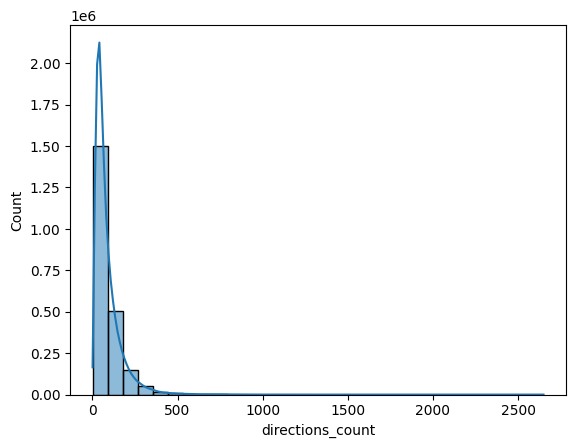

In [24]:
data['directions_count'] = data['directions'].apply(lambda x: len(str(x).split()))
sns.histplot(data['directions_count'], bins=30, kde=True)
plt.show()

In [25]:
data.nsmallest(5, "directions_count")[["title", "directions", "directions_count"]]

,title,directions,directions_count
1651951,Cinnamon Roll Fillings,"[""mix.""]",1
1656407,Better Than Bailey's Irish Cream Recipe,"[""mix.""]",1
1659733,Dijon Crab Cake Sauce Recipe,"[""saut""]",1
1659966,Peach Watermelon Smoothie,"[""blend.""]",1
1660875,SupaDupa Greens Juice,"[""juice.""]",1


In [26]:
data.nlargest(5, "directions_count")[["title", "directions", "directions_count"]]

,title,directions,directions_count
1717085,Moon Cakes,"[""in a small saucepan, combine the sugar, citr...",2649
1739457,Mike's NY Cheesecake 101,"[""preheat oven to 350 (175 degrees c)."", ""trip...",2605
2012938,Making Egg Dough Pastas,"[""measure the flour and shake it through a sie...",2570
1702484,Cannelloni with Asparagus and Ham,"[""trim 1 inch or more off the butt ends of the...",2528
1333030,Basic Brioche,"[""in the mixer bowl, place the water, sugar, i...",2437


In [27]:
data.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,ingredients_count,NER_count,directions_count
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""in a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu...",6,6,60
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom...",5,4,29
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""in a slow cooker, combine all ingredients. c...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar...",8,6,30
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""boil and debone chicken."", ""put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo...",5,4,63
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu...",5,5,35


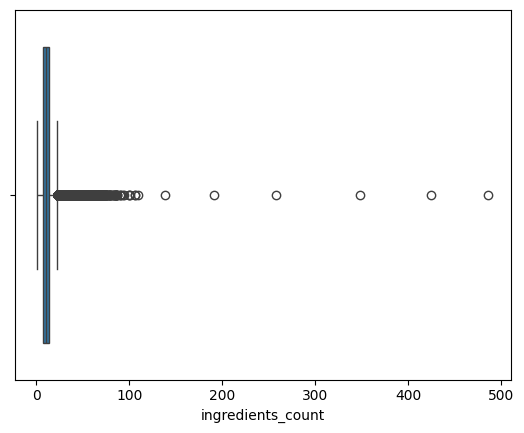

In [26]:
sns.boxplot(x = data["ingredients_count"])
plt.show()

In [28]:
data.nlargest(10, "ingredients_count")[["title", "ingredients_count", "ingredients"]]

,title,ingredients_count,ingredients
719239,Grandma'S Chicken Fricassee,486,"[""1 lb. chopped meat"", ""1 egg"", ""1/2 c. season..."
122527,Layered Salad,424,"[""lettuce, torn into small pieces"", ""carrots, ..."
27310,Strawberry Butter,348,"[""1 c. powdered sugar"", ""1 egg yolk"", ""1/2 c. ..."
719917,Dumplings And Cabbage,258,"[""1 c. flour"", ""1 egg"", ""milk"", ""dash of salt""..."
1987715,Standard Herbs & Their Uses,191,"[""an annual plant of the mint family cultivate..."
1758895,Standard Spices & Their Uses,138,"[""berry of a caribbean tree with the combined ..."
2180810,Seasonal Chutney,109,"[""2 ounces fresh ginger, bruised"", ""12 cloves""..."
1478637,Banh Chung For Lunar New Year Recipe,106,"[""5 1/4 cups long-grain sticky rice (soaked ov..."
1769297,Smorgasbord,106,"[""grated fresh horseradish"", ""dijon mustard"", ..."
653572,Lentil Chili(You'Ll Never Miss The Meat In Thi...,101,"[""1/3 c. olive oil"", ""1 medium onion, cut into..."


In [28]:
from wordcloud import WordCloud

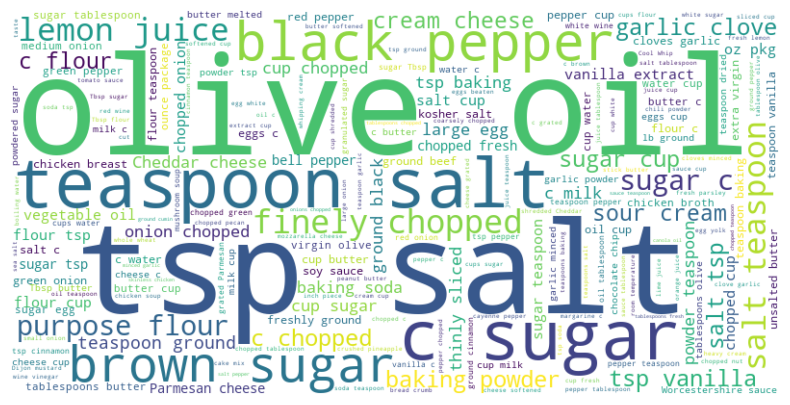

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['ingredients'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
data[(data["ingredients_count"] >= 40) & (data["ingredients_count"] <= 100)].count()

Unnamed: 0           3332
title                3332
ingredients          3332
directions           3332
link                 3332
source               3332
NER                  3332
ingredients_count    3332
NER_count            3332
directions_count     3332
dtype: int64

In [30]:
data["ingredients_count"].mean()

10.646280535385259

In [31]:
data["ingredients_count"].std()

5.586351118330331

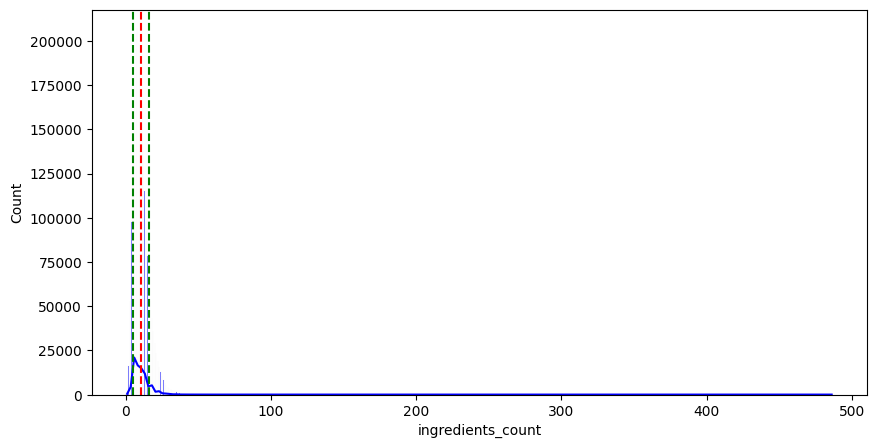

In [33]:
plt.figure(figsize = (10, 5))
sns.histplot(data["ingredients_count"], kde = True, color = "blue")

plt.axvline(data["ingredients_count"].mean(), color = "red", linestyle = "dashed")
plt.axvline(data["ingredients_count"].mean() + data["ingredients_count"].std(), color = "green", linestyle = "dashed")
plt.axvline(data["ingredients_count"].mean() - data["ingredients_count"].std(), color = "green", linestyle = "dashed")

plt.show()

## We can change the values below and have more std as a limit

In [32]:
data["ingredients_count"].mean() + data["ingredients_count"].std()

16.23263165371559

In [33]:
data["ingredients_count"].mean() - data["ingredients_count"].std()

5.059929417054928

In [34]:
from collections import Counter

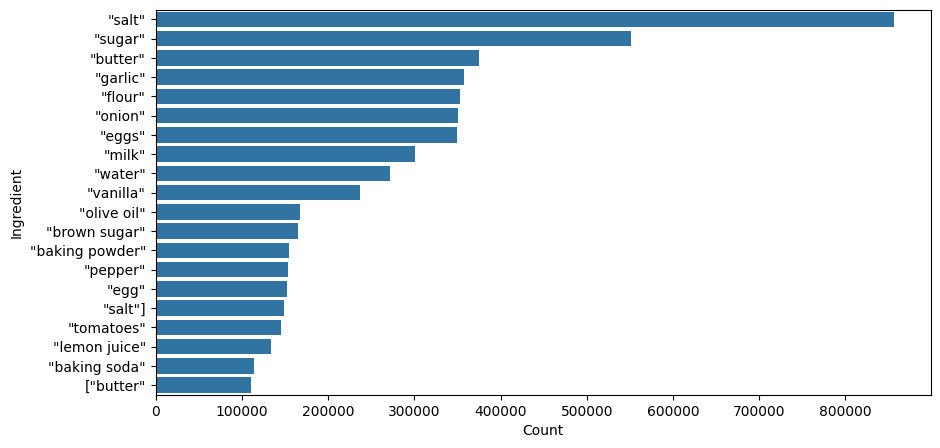

In [37]:
all_ingredients = ",".join(data["NER"].dropna()).split(",")
ingredient_counts = Counter([ingredient.strip().lower() for ingredient in all_ingredients])
most_common_ingredients = pd.DataFrame(ingredient_counts.most_common(20), columns = ["Ingredient", "Count"])

plt.figure(figsize = (10, 5))
sns.barplot(x = "Count", y = "Ingredient", data = most_common_ingredients)
plt.show()

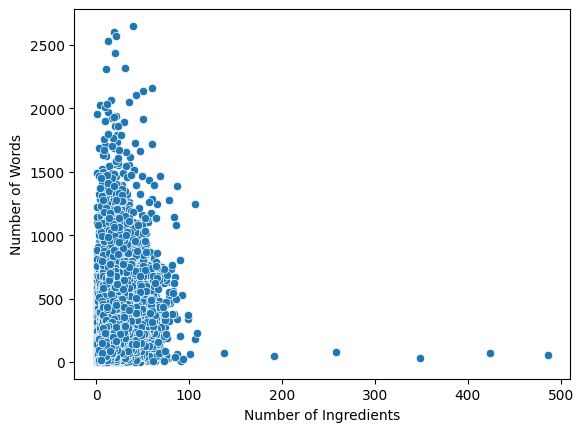

In [38]:
sns.scatterplot(x=data["ingredients_count"], y=data["directions_count"])
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Words")
plt.show()

### After categorizing them, we can see how much recipes of each category we have

In [35]:
data["ingredients"]

0          ["1 c. firmly packed brown sugar", "1/2 c. eva...
1          ["1 small jar chipped beef, cut up", "4 boned ...
2          ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...
3          ["1 large whole chicken", "2 (10 1/2 oz.) cans...
4          ["1 c. peanut butter", "3/4 c. graham cracker ...
                                 ...                        
2231137    ["1/2 cup chocolate hazelnut spread (recommend...
2231138    ["1 dozen eggs", "1 paprika", "1 salt and pepp...
2231139    ["150 grams daikon radish", "1 tbsp sesame oil...
2231140    ["1 cup apple cider", "6 tablespoons sugar", "...
2231141    ["1 pound ground veal", "1/2 pound sweet itali...
Name: ingredients, Length: 2231141, dtype: object

In [36]:
data["NER"][643]

'["butter", "rice", "white onion", "cream of mushroom soup", "beef bouillon"]'

In [37]:
data["ingredients"][643]

'["3/4 stick butter", "1 c. uncooked rice", "1 medium white onion, chopped", "1 can cream of mushroom soup", "1 can beef bouillon"]'

In [38]:
data["directions"][3]

'["boil and debone chicken.", "put bite size pieces in average size square casserole dish.", "pour gravy and cream of mushroom soup over chicken; level.", "make stuffing according to instructions on box (do not make too moist).", "put stuffing on top of chicken and gravy; level.", "sprinkle shredded cheese on top and bake at 350\\u00b0 for approximately 20 minutes or until golden and bubbly."]'

In [39]:
unique = set(value.strip() for row in data["NER"] for value in row.split(", "))

In [40]:
unique

{'"calorie reduce"]',
 '"bay leaves +"]',
 '"maldive fish"]',
 '["bottom ice cream comes"',
 '["roll sushi rice"',
 '"low fat cottage"',
 '"pack bon curry sauce mix"',
 '["refrigertaed"',
 '"white suger"',
 '"italian seasoning-optional"',
 '["first choice"',
 '["cold whipping"',
 '["marinating oil"',
 '"premade shortbread"',
 '["chicken minute rice"',
 '"urid"',
 '"chamomile creme anglaise"]',
 '"anise bulb tops"',
 '"firm yogurt"',
 '"parafin wax"',
 '"applewood smoke bacon"',
 '"orange half-wheel"]',
 '"brown sugar light"]',
 '"canning rack"]',
 '"grnd cranberries"',
 '"lemon juice paprika"]',
 '"free-range eggs"]',
 '"eagle mills"',
 '["salsa"',
 '["purple shallots"',
 '"curd/ yogurt"',
 '"whipped butter"]',
 '["wild leek"',
 '"coarse semolina flour"]',
 '"frozen lemonaide"',
 '"sesame seeds cracked"',
 '["redenbacher\'s popping"',
 '"white rhine wine"',
 '["rioja"',
 '"tray ice cubes"]',
 '"whole snapper fillet"]',
 '"extra virgin vegetable oil"',
 '"cream cherries"',
 '"italian dr

# Cleaning

In [41]:
data.columns

Index(['Unnamed: 0', 'title', 'ingredients', 'directions', 'link', 'source',
       'NER', 'ingredients_count', 'NER_count', 'directions_count'],
      dtype='object')

### Cleaning on ingredients, directions and NER

In [42]:
data["ingredients"] = [d.lower() for d in data["ingredients"]]
data["directions"] = [d.lower() for d in data["directions"]]
data["NER"] = [d.lower() for d in data["NER"]]

In [43]:
data["directions"]

0          ["in a heavy 2-quart saucepan, mix brown sugar...
1          ["place chipped beef on bottom of baking dish....
2          ["in a slow cooker, combine all ingredients. c...
3          ["boil and debone chicken.", "put bite size pi...
4          ["combine first four ingredients and press in ...
                                 ...                        
2231137    ["spread hazelnut spread on 1 side of each tor...
2231138    ["boil eggs on medium for 30mins.", "then cool...
2231139    ["julienne the daikon and squeeze out the exce...
2231140    ["in a large bowl, mix the apple cider with 4 ...
2231141    ["preheat the oven to 350.", "in a bowl, mix t...
Name: directions, Length: 2231141, dtype: object

In [45]:
import string

In [46]:
ingredients_punctuations = list(
    filter(
        lambda t: all(c in string.punctuation for c in t),
        data["ingredients"]
    )
)

directions_punctuations = list(
    filter(
        lambda t: all(c in string.punctuation for c in t),
        data["directions"]
    )
)

ner_punctuations = list(
    filter(
        lambda t: all(c in string.punctuation for c in t),
        data["NER"]
    )
)

In [47]:
ingredients_punctuations = set(ingredients_punctuations)
directions_punctuations = set(directions_punctuations)
ner_punctuations = set(ner_punctuations)

In [52]:
ingredients_punctuations

{'["."]',
 '[".................................................................."]'}

In [56]:
from tqdm import tqdm

In [61]:
ingredients_clean = [t for t in tqdm(data["ingredients"]) if t not in ingredients_punctuations]
directions_clean = [t for t in tqdm(data["directions"]) if t not in directions_punctuations]
ner_clean = [t for t in tqdm(data["NER"]) if t not in ner_punctuations]

100%|███████████████████████████████████████████████████████████████████| 2231141/2231141 [00:00<00:00, 3078109.41it/s]


In [62]:
ner_clean

['["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]',
 '["beef", "chicken breasts", "cream of mushroom soup", "sour cream"]',
 '["frozen corn", "cream cheese", "butter", "garlic powder", "salt", "pepper"]',
 '["chicken", "chicken gravy", "cream of mushroom soup", "shredded cheese"]',
 '["peanut butter", "graham cracker crumbs", "butter", "powdered sugar", "chocolate chips"]',
 '["baking potatoes", "extra lean ground beef", "butter", "milk", "salt", "pepper", "cheddar cheese", "bacon", "green onion", "sour cream"]',
 '["sugar", "butter", "egg", "buttermilk", "flour", "salt", "soda", "buttermilk", "rhubarb", "vanilla"]',
 '["cream-style corn", "whole kernel corn", "crackers", "egg", "butter", "pepper"]',
 '["tomatoes", "water", "onions", "worcestershire sauce", "green peppers", "oil"]',
 '["pineapple", "condensed milk", "lemons", "pecans", "graham cracker crusts"]',
 '["dark sweet pitted cherries", "ginger ale", "flavor gelatin", "boiling water", "a